In [45]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

In [67]:
# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [68]:
ruta = "D:/UNA-PUNO/UNA-SEMESTRES/SEPTIMO SEMESTRE/APRENDIZAJE SUPERVISADO/REGRESION MULTIPLE/datos_quinua.xlsx"

In [69]:
df = pd.read_excel(ruta)
df

,producción,Cantidad de hojas,Altura de la planta,Diámetro de la planta,Longitud de la panoja,Diámetro de la panoja
0,9.4,127.0,74.2,9.0,23.3,5.1
1,8.0,83.0,96.4,9.0,30.4,4.6
2,5.7,139.0,86.4,7.0,18.4,3.6
3,4.2,101.0,85.6,7.0,NaN,333.3
4,10.1,82.0,84.9,9.0,24.3,4.9
...,...,...,...,...,...,...
74,3.9,54.0,670.6,5.0,18.9,3.4
75,3.6,65.0,65.4,6.0,14.8,3.8
76,9.2,127.0,74.2,9.0,23.4,5.1
77,6.2,103.0,85.4,9.0,18.6,3.8


In [70]:
# Renombrar las columnas para facilitar la manipulación de datos
df.columns = [
    'produccion', 'hojas', 'altura_planta', 'diametro_planta', 'longitud_panoja', 'diametro_panoja'
]
df

,produccion,hojas,altura_planta,diametro_planta,longitud_panoja,diametro_panoja
0,9.4,127.0,74.2,9.0,23.3,5.1
1,8.0,83.0,96.4,9.0,30.4,4.6
2,5.7,139.0,86.4,7.0,18.4,3.6
3,4.2,101.0,85.6,7.0,NaN,333.3
4,10.1,82.0,84.9,9.0,24.3,4.9
...,...,...,...,...,...,...
74,3.9,54.0,670.6,5.0,18.9,3.4
75,3.6,65.0,65.4,6.0,14.8,3.8
76,9.2,127.0,74.2,9.0,23.4,5.1
77,6.2,103.0,85.4,9.0,18.6,3.8


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   produccion       79 non-null     float64
 1   hojas            78 non-null     float64
 2   altura_planta    78 non-null     float64
 3   diametro_planta  78 non-null     float64
 4   longitud_panoja  77 non-null     float64
 5   diametro_panoja  79 non-null     float64
dtypes: float64(6)
memory usage: 3.8 KB


In [72]:
# observando numero de datos y variables
df.shape

(79, 6)

In [73]:
df.isna().sum()

produccion         0
hojas              1
altura_planta      1
diametro_planta    1
longitud_panoja    2
diametro_panoja    0
dtype: int64

# Hacemos una pequeña limpieza de datos
- Eliminar filas con valores NaN
- Limitar el diámetro de la panoja a un valor razonable (descartamos el 333.3 como atípico)

In [93]:
# valores nulos
data = df.dropna()

In [95]:
data.isna().sum()

produccion         0
hojas              0
altura_planta      0
diametro_planta    0
longitud_panoja    0
diametro_panoja    0
dtype: int64

In [96]:
data.describe()

,produccion,hojas,altura_planta,diametro_planta,longitud_panoja,diametro_panoja
count,75.000000,75.000000,75.000000,75.000000,75.00000,75.000000
mean,5.904000,93.186667,118.161333,7.493333,26.60800,3.856000
std,2.179725,31.102574,148.983649,1.492081,45.83722,0.739839
min,2.400000,43.000000,62.400000,5.000000,9.40000,2.800000
25%,3.900000,64.000000,71.700000,7.000000,17.10000,3.300000
50%,5.700000,91.000000,81.800000,8.000000,18.90000,3.800000
75%,7.350000,123.000000,85.900000,9.000000,22.85000,4.600000
max,10.200000,142.000000,670.600000,9.000000,300.20000,5.100000


<Axes: >

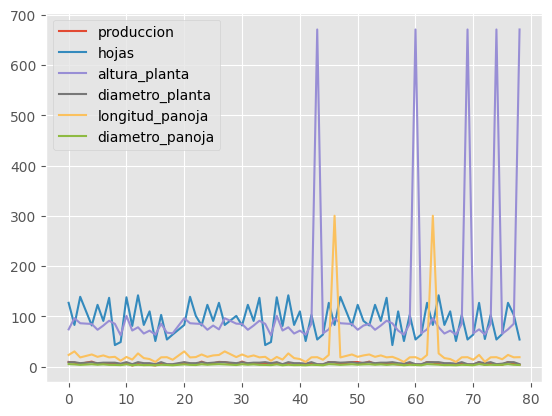

In [97]:
data.plot()

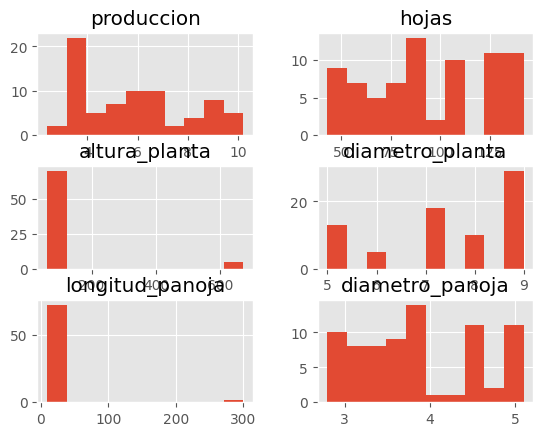

In [98]:
data.hist()
plt.show()

In [99]:
# Función para convertir la matriz de correlación en formato ordenado (tidy)
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1', 'variable_2', 'r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    return corr_mat

# Calculamos la matriz de correlación para las columnas numéricas
corr_matrix = data.corr(method='pearson')

# Aplicamos la función para obtener las correlaciones más importantes
tidy_corr = tidy_corr_matrix(corr_matrix)

# Mostramos las 10 correlaciones más fuertes
tidy_corr.head(10)

,variable_1,variable_2,r,abs_r
5,produccion,diametro_panoja,0.889785,0.889785
30,diametro_panoja,produccion,0.889785,0.889785
18,diametro_planta,produccion,0.803383,0.803383
3,produccion,diametro_planta,0.803383,0.803383
33,diametro_panoja,diametro_planta,0.777685,0.777685
23,diametro_planta,diametro_panoja,0.777685,0.777685
19,diametro_planta,hojas,0.504663,0.504663
9,hojas,diametro_planta,0.504663,0.504663
1,produccion,hojas,0.409131,0.409131
6,hojas,produccion,0.409131,0.409131


### Visualizamos los datos con un mapa de calor
Ventajas
- Claridad visual
- Patrones
- Detección de multicolinealidad

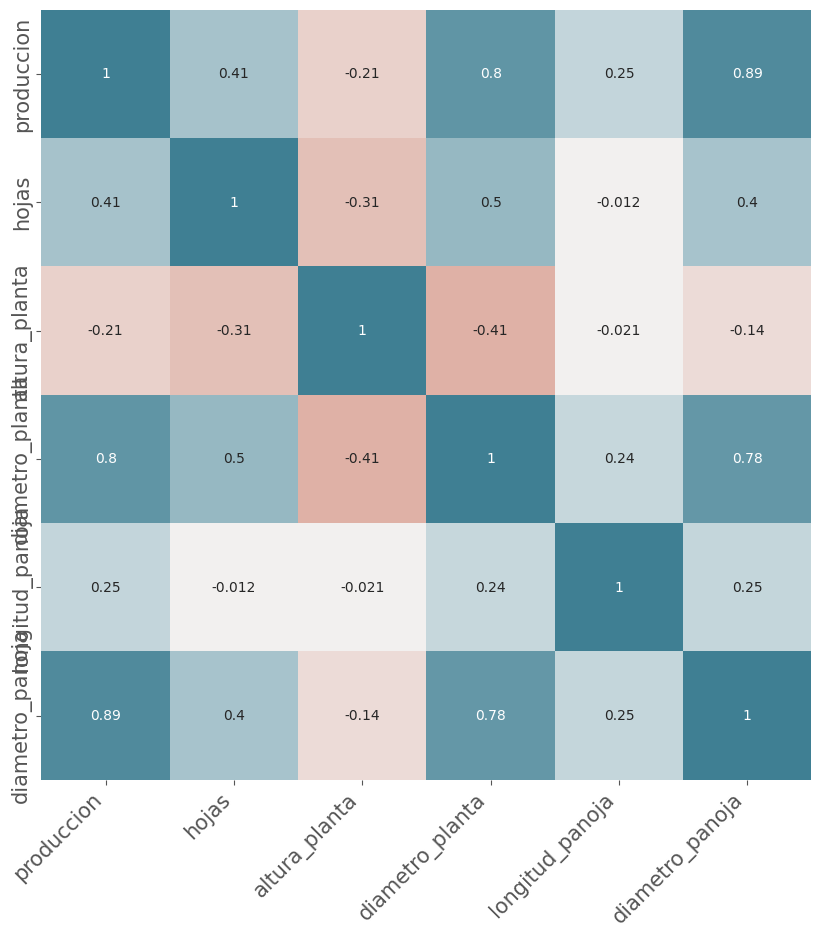

In [100]:
# Creamos el heatmap de la matriz de correlación
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot=True,             # Mostrar valores de correlación en el mapa
    cbar=False,             # Ocultar la barra de colores
    annot_kws={"size": 10}, # Tamaño de las anotaciones
    vmin=-1,                # Mínimo valor en el mapa de correlaciones
    vmax=1,                 # Máximo valor en el mapa de correlaciones
    center=0,               # Centrar el color en 0
    cmap=sns.diverging_palette(20, 220, n=200),  # Paleta de colores divergente
    square=True,            # Formato cuadrado para cada celda
    ax=ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,           # Rotar etiquetas en el eje x
    horizontalalignment='right',
)

ax.tick_params(labelsize=15)

plt.show()

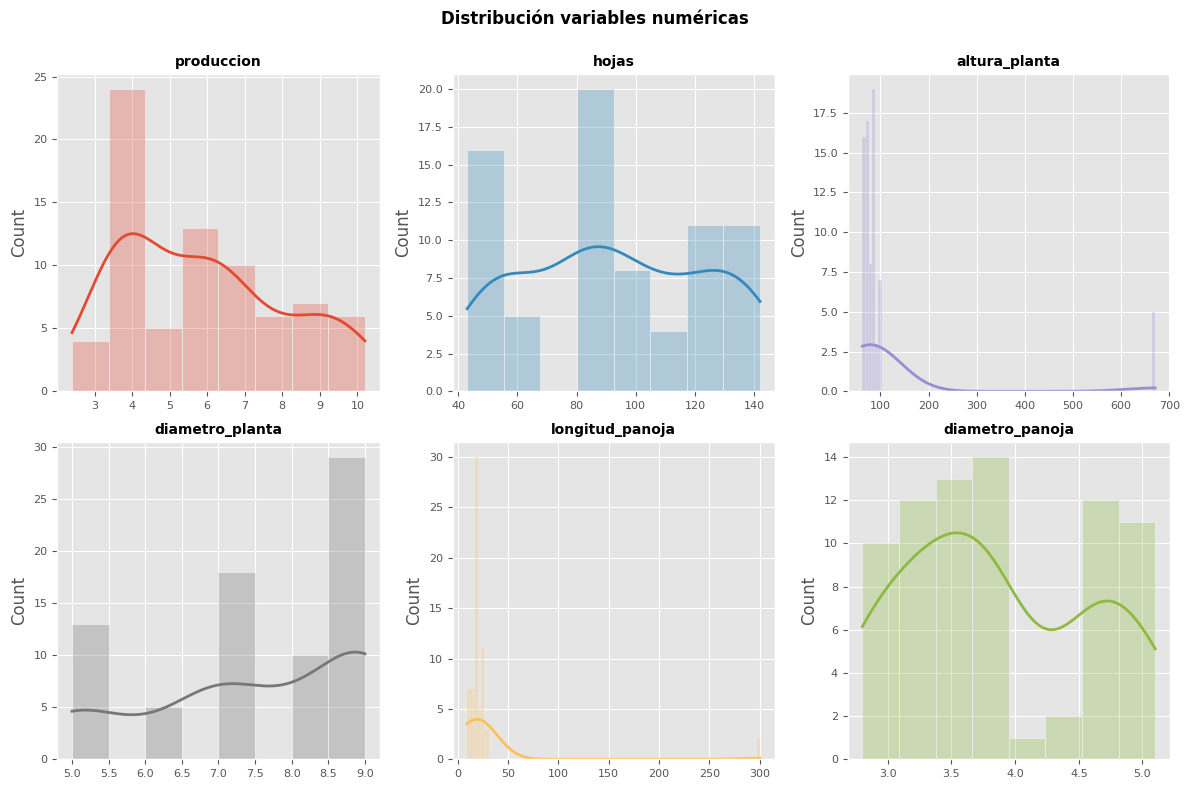

In [101]:
# Crear gráficos de distribución para cada variable numérica
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flat

# Columnas numéricas de quinua
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns

# Graficar la distribución de cada variable
for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = data,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 12, fontweight = "bold")
plt.show()


In [102]:
# Definir las variables predictoras (X) y la variable respuesta (Y)
X = data[['hojas', 'altura_planta', 'diametro_planta', 'longitud_panoja', 'diametro_panoja']]
Y = data['produccion']


In [103]:
# Dividir los datos en 60% para entrenamiento y 20% para prueba (test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.6, random_state=42)

# Mostrar el tamaño de los conjuntos de datos
(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

((45, 5), (15, 5), (45,), (15,))

In [105]:
# modelo
modelo = LinearRegression()
# entrenamos el modelo
modelo.fit(X=X_train, y=Y_train)

LinearRegression()

In [106]:
# Realizar predicciones en el conjunto de prueba
Y_pred1 = modelo.predict(X_test)
Y_pred1

array([5.9255595 , 3.39770351, 2.93914767, 9.15721744, 6.74855525,
       4.38100172, 5.9255595 , 4.38100172, 6.59303059, 6.59303059,
       2.93914767, 9.15725565, 5.9255595 , 8.21414022, 8.34097903])

In [107]:
# Calcular el MSE y el RMSE
mse = mean_squared_error(y_true=Y_test.dropna(), y_pred=Y_pred1)
rmse = np.sqrt(mse)

# Mostrar los resultados
print(f'Error Cuadrático Medio (MSE) = {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE) = {rmse}')

Error Cuadrático Medio (MSE) = 0.43237342603435186
Raíz del Error Cuadrático Medio (RMSE) = 0.657551082452422


In [108]:
# Calcular el Coeficiente de Determinación R2
r2 = modelo.score(X_test.dropna(), Y_test.dropna())
print(f'Coeficiente de Determinación R2 = {r2}')

Coeficiente de Determinación R2 = 0.9025366465719632


El coeficiente de determinación r2  es 0.903, lo que indica que el modelo de regresión lineal múltiple explica el 90.3% de la variabilidad en la producción de quinua a partir de las variables predictoras.

## Calculamos los test estadisticos

In [109]:
# Dividir los datos en entrenamiento y prueba nuevamente (sin valores NaN)
X_train, X_test, Y_train, Y_test = train_test_split(X.dropna(), Y.dropna(), test_size=0.2, random_state=1234)

In [110]:
# Añadir una constante al modelo (para el intercepto)
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo de regresión con statsmodels
modelo_sm = sm.OLS(endog=Y_train, exog=X_train).fit()

# Mostrar el resumen del modelo
modelo_sm_summary = modelo_sm.summary()
modelo_sm_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             produccion   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     74.09
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           6.18e-23
Time:                        06:59:50   Log-Likelihood:                -67.394
No. Observations:                  60   AIC:                             146.8
Df Residuals:                      54   BIC:                             159.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.5636      0.615     -7.422      0.000      -5.796      -3.331
hojas              -0.0051      0.004     -1.227      0.225      -0.013       0.003
altura_planta    3.405e-05      0.001      0.047      0.963      -0.001       0.001
diametro_planta     0.4610      0.124      3.712      0.000       0.212       0.710
longitud_panoja     0.0009      0.002      0.413      0.682      -0.003       0.005
diametro_panoja     1.9106      0.230      8.322      0.000       1.450       2.371
==============================================================================
Omnibus:                        0.822   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.489
Skew:                          -0.219   Prob(JB):                        0.783
Kurtosis:                       3.064   Cond. No.                     1.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
# Calcular los intervalos de confianza para los coeficientes del modelo
intervalos_ci = modelo_sm.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']

# Mostrar los intervalos de confianza
intervalos_ci

,2.5%,97.5%
const,-5.796410,-3.330859
hojas,-0.013461,0.003242
altura_planta,-0.001428,0.001496
diametro_planta,0.212017,0.710011
longitud_panoja,-0.003383,0.005136
diametro_panoja,1.450314,2.370962


In [112]:
# Realizar las predicciones con el modelo entrenado y obtener el resumen del marco de predicciones
predicciones = modelo_sm.get_prediction(exog=X_train).summary_frame(alpha=0.05)

# Mostrar las primeras 4 filas de las predicciones
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
74,4.001098,0.350610,3.298168,4.704029,2.278799,5.723397
20,7.980281,0.196826,7.585669,8.374894,6.359195,9.601368
75,5.145966,0.228120,4.688613,5.603319,3.508476,6.783456
59,6.338863,0.209901,5.918037,6.759689,4.711197,7.966529


In [113]:
# Añadir una constante al conjunto de prueba
X_test = sm.add_constant(X_test, prepend=True)

# Realizar las predicciones en el conjunto de prueba
predicciones_test = modelo_sm.predict(exog=X_test)

# Calcular el RMSE para el conjunto de prueba
rmse_test = mean_squared_error(y_true=Y_test, y_pred=predicciones_test, squared=False)

# Mostrar el RMSE
print(f"El error (rmse) de test es: {rmse_test}")

El error (rmse) de test es: 1.438405446080858


## Diagnostico de los Residuales

In [114]:
# Calcular las predicciones y los residuos del conjunto de entrenamiento
prediccion_train = modelo_sm.predict(exog=X_train)
residuos_train = prediccion_train - Y_train

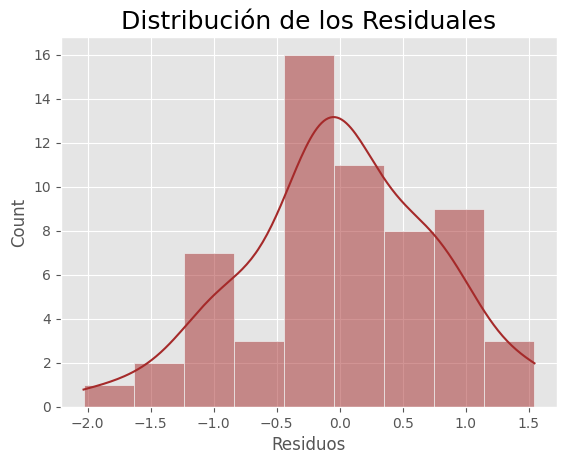

In [116]:
sns.histplot(Y_train - prediccion_train, color='brown', kde=True)
plt.title('Distribución de los Residuales', size=18)
plt.xlabel('Residuos')
plt.show()

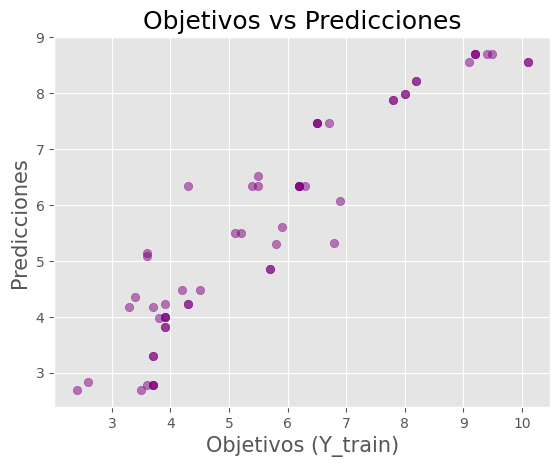

In [117]:
# Graficar los objetivos (valores reales) frente a las predicciones en el conjunto de entrenamiento
plt.scatter(Y_train, prediccion_train, alpha=0.5, color='purple')
plt.xlabel('Objetivos (Y_train)', size=15)
plt.ylabel('Predicciones', size=15)
plt.title('Objetivos vs Predicciones', size=18)
plt.show()

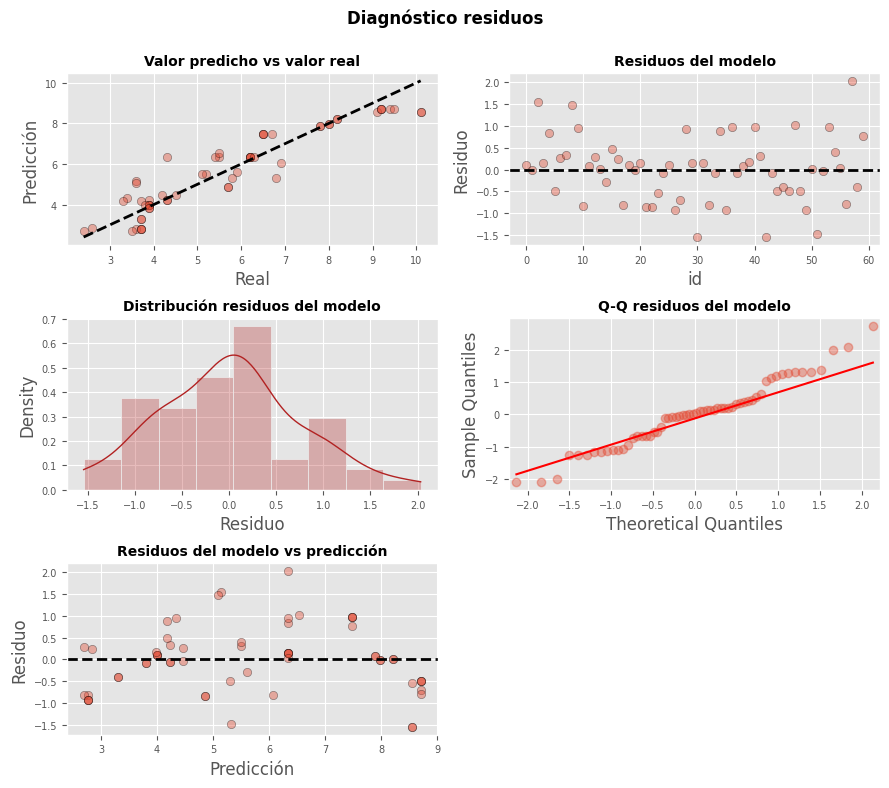

In [118]:
# Graficar los diferentes diagnósticos de residuos en subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

# Gráfico de valores predichos vs valores reales
axes[0, 0].scatter(Y_train, prediccion_train, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 0].plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()],
                'k--', color='black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize=10, fontweight="bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize=7)

# Gráfico de residuos
axes[0, 1].scatter(list(range(len(Y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 1].axhline(y=0, linestyle='--', color='black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize=10, fontweight="bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize=7)

# Distribución de los residuos
sns.histplot(
    data=residuos_train,
    stat="density",
    kde=True,
    line_kws={'linewidth': 1},
    color="firebrick",
    alpha=0.3,
    ax=axes[1, 0]
)
axes[1, 0].set_title('Distribución residuos del modelo', fontsize=10, fontweight="bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize=7)

# Q-Q plot de los residuos
sm.qqplot(
    residuos_train,
    fit=True,
    line='q',
    ax=axes[1, 1],
    color='firebrick',
    alpha=0.4,
    lw=2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize=10, fontweight="bold")
axes[1, 1].tick_params(labelsize=7)

# Residuos vs predicción
axes[2, 0].scatter(prediccion_train, residuos_train, edgecolors=(0, 0, 0), alpha=0.4)
axes[2, 0].axhline(y=0, linestyle='--', color='black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize=10, fontweight="bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize=7)

# Eliminar axes vacío
fig.delaxes(axes[2, 1])

# Ajustes finales
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize=12, fontweight="bold")
plt.show()


In [120]:
# Prueba de normalidad de Shapiro-Wilk para los residuos
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.9739915242663381, pvalue=0.22773618881228702)

In [121]:
# Prueba de normalidad D'Agostino's K-squared test
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 0.8221852080729404, p-value = 0.6629255391773712


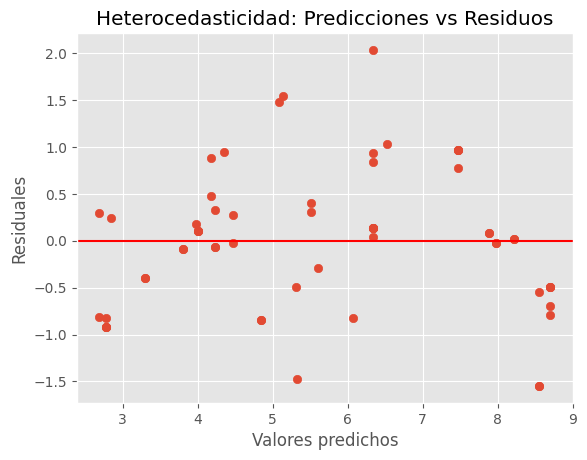

In [122]:
# Graficar los residuos vs los valores predichos para evaluar la heterocedasticidad
plt.scatter(prediccion_train, residuos_train)
plt.axhline(0, color="red")
plt.xlabel("Valores predichos")
plt.ylabel("Residuales")
plt.title("Heterocedasticidad: Predicciones vs Residuos")
plt.show()

In [124]:
# Test de Breusch-Pagan para heterocedasticidad
breusch_pagan = sms.het_breuschpagan(modelo_sm.resid, modelo_sm.model.exog)[1]  # p-value
breusch_pagan


0.08884586459651639

In [125]:
# Resultado del test de Breusch-Pagan
if breusch_pagan > 0.05:
    hetero_result = "No es heterocedástica"
else:
    hetero_result = "Es heterocedástica"
hetero_result

'No es heterocedástica'

Dado que el p-valor es mayor que 0.05, podemos concluir que no es heterocedástica, lo que significa que no hay un problema significativo de varianza no constante en los residuos.

In [126]:
# Test de autocorrelación de Ljung-Box
test_ljung = sms.acorr_ljungbox(residuos_train, lags=10)
test_ljung

,lb_stat,lb_pvalue
1,0.506280,0.476753
2,0.506328,0.776340
3,0.669002,0.880470
4,1.078578,0.897656
5,1.760342,0.881212
6,1.765242,0.939974
7,4.711226,0.695155
8,6.868431,0.550892
9,6.935709,0.643813
10,6.946042,0.730529


Los p-valores para los 10 retardos (lags) son todos mayores que 0.05, lo que indica que no hay evidencia significativa de autocorrelación en los residuos. Esto sugiere que los residuos son independientes entre sí, lo cual es un supuesto importante de los modelos de regresión.

In [127]:
# Realizar las predicciones en el conjunto de prueba
y_pred = modelo_sm.predict(X_test)

# Mostrar los valores predichos
y_pred

50    5.506179
67    3.302067
56    7.983778
55    5.322206
7     5.322206
32    7.470881
65    4.179597
30    8.552843
9     3.887537
24    5.506179
23    8.552843
5     5.506179
27    7.980281
68    6.338863
76    8.703894
dtype: float64

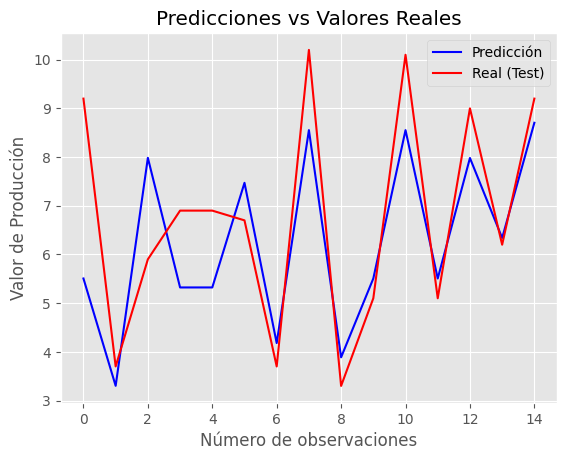

In [128]:
# Graficar los valores predichos vs los valores reales (test)
plt.figure()
plt.plot(range(len(y_pred)), y_pred, 'b', label="Predicción")  # Línea de predicciones
plt.plot(range(len(Y_test)), Y_test, 'r', label="Real (Test)")  # Línea de valores reales
plt.xlabel("Número de observaciones")
plt.ylabel("Valor de Producción")
plt.legend()  # Mostrar la leyenda
plt.title("Predicciones vs Valores Reales")
plt.show()

Hasta ahora, sabemos que el diámetro de la planta y el diámetro de la panoja son los más significativos. 

## Selección hacia adelante (Forward Selection)

In [129]:
# Función para realizar la selección hacia adelante
def forward_selection(X, Y, significance_level=0.05):
    initial_features = X.columns.tolist()
    selected_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(selected_features))
        pval_series = pd.Series(index=remaining_features)
        for feature in remaining_features:
            X_train_with_const = sm.add_constant(X[selected_features + [feature]])
            model = sm.OLS(Y, X_train_with_const).fit()
            pval_series[feature] = model.pvalues[feature]
        min_p_value = pval_series.min()
        if min_p_value < significance_level:
            best_feature = pval_series.idxmin()
            selected_features.append(best_feature)
        else:
            break
    return selected_features

# Aplicar la selección hacia adelante
mejores_predictores = forward_selection(X, Y)

# Mostrar los mejores predictores seleccionados
mejores_predictores

['diametro_panoja', 'diametro_planta']

## Selección hacia atrás (Backward Elimination)

In [130]:
# Función para realizar la selección hacia atrás
def backward_elimination(X, Y, significance_level=0.05):
    features = X.columns.tolist()
    while len(features) > 0:
        X_train_with_const = sm.add_constant(X[features])
        model = sm.OLS(Y, X_train_with_const).fit()
        p_values = model.pvalues[1:]  # Excluimos el p-valor de la constante
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

# Aplicar la selección hacia atrás
mejores_predictores_backward = backward_elimination(X, Y)

# Mostrar los mejores predictores seleccionados por backward elimination
mejores_predictores_backward


['diametro_planta', 'diametro_panoja']

In [132]:
# Ajustar el modelo final excluyendo las variables menos importantes
predictores = ['diametro_planta', 'diametro_panoja']
X_train_final = X_train[predictores]

# Crear y ajustar el nuevo modelo de regresión con los predictores seleccionados
modelo_final = sm.OLS(endog=Y_train, exog=X_train_final)
modelo_final_res = modelo_final.fit()

# Mostrar el resumen del nuevo modelo
modelo_final_res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             produccion   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              787.7
Date:                Mon, 30 Sep 2024   Prob (F-statistic):                    9.11e-43
Time:                        07:43:20   Log-Likelihood:                         -93.132
No. Observations:                  60   AIC:                                      190.3
Df Residuals:                      58   BIC:                                      194.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
diametro_planta     0.2098      0.148      1.414      0.163      -0.087       0.507
diametro_panoja     1.1270      0.289      3.905      0.000       0.549       1.705
==============================================================================
Omnibus:                        4.387   Durbin-Watson:                   2.274
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                4.268
Skew:                           0.642   Prob(JB):                        0.118
Kurtosis:                       2.757   Cond. No.                         18.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Resultados clave:
- R-squared (R²): 0.964, lo que significa que el modelo explica el 96.4% de la variabilidad en la producción de quinua.
- Prob(F-statistic): 9.11e-43, lo que indica que el modelo en su conjunto es altamente significativo.
##### Coeficientes:
- Diámetro de la planta: Coeficiente de 0.2098, pero no es estadísticamente significativo (p = 0.163).
- Diámetro de la panoja: Coeficiente de 1.1270, estadísticamente significativo (p < 0.001).
#### Interpretación:
- El diámetro de la panoja sigue siendo el predictor más relevante, con un impacto positivo y significativo en la producción.
- El diámetro de la planta tiene un coeficiente positivo pero no es estadísticamente significativo en este modelo simplificado.

## Selección basada en regularización (Lasso)

In [131]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Normalizar los datos antes de aplicar Lasso (Lasso es sensible a la escala de los datos)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar el modelo de Lasso con un valor de alpha (penalización)
lasso_model = Lasso(alpha=0.1)  # Puedes ajustar el valor de alpha
lasso_model.fit(X_scaled, Y)

# Obtener los coeficientes resultantes
coeficientes_lasso = pd.Series(lasso_model.coef_, index=X.columns)

# Mostrar los coeficientes de Lasso (los que son cero han sido eliminados del modelo)
coeficientes_lasso[coeficientes_lasso != 0]


diametro_planta    0.554245
diametro_panoja    1.395485
dtype: float64

El modelo de Lasso ha seleccionado las siguientes variables como los predictores más importantes:
- Diámetro de la planta (coeficiente: 0.554)
- Diámetro de la panoja (coeficiente: 1.395)

Las demás variables fueron eliminadas, ya que Lasso ha reducido sus coeficientes a cero, lo que indica que no tienen un impacto significativo en el modelo.

## Selección basada en importancia (Random Forests)

In [139]:
# Tratamiento de datos
import numpy as np
import pandas as pd
# Gráficos
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 8
# Preprocesado y modelado
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from joblib import Parallel, delayed, cpu_count

import optuna
import warnings

optuna.logging.set_verbosity(optuna.logging.WARNING)

In [134]:
# Crear el conjunto de entrenamiento y prueba para Random Forest
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

# Crear el modelo de Random Forest
modelo_rf = RandomForestRegressor(
    n_estimators=10,  # Número de árboles
    criterion='squared_error',
    max_depth=None,
    max_features=1,
    oob_score=False,
    n_jobs=-1,  # Usar todos los núcleos disponibles
    random_state=123
)

# Entrenar el modelo
modelo_rf.fit(X_train, Y_train)

RandomForestRegressor(max_features=1, n_estimators=10, n_jobs=-1,
                      random_state=123)

In [136]:
# Realizar predicciones en el conjunto de prueba
predicciones_rf = modelo_rf.predict(X_test)

# Calcular el RMSE para el conjunto de prueba
rmse_rf = mean_squared_error(y_true=Y_test, y_pred=predicciones_rf, squared=False)
rmse_rf

0.5385023048089768

RMSE (Error Cuadrático Medio): 0.539. Este valor es relativamente bajo, lo que indica que el modelo de Random Forest tiene un buen rendimiento en la predicción de la producción de quinua.

In [138]:
# Importancia de los predictores en Random Forest
importancia_predictores_rf = pd.DataFrame(
    {'predictor': X_train.columns, 'importancia': modelo_rf.feature_importances_}
)

# Ordenar los predictores por importancia
importancia_predictores_rf = importancia_predictores_rf.sort_values('importancia', ascending=False)

# Mostrar resultados
importancia_predictores_rf

,predictor,importancia
4,diametro_panoja,0.330282
1,altura_planta,0.237082
3,longitud_panoja,0.175893
0,hojas,0.148119
2,diametro_planta,0.108624


#### Importancia de los predictores:

- Diámetro de la panoja: 33.03% (el predictor más importante).
- Altura de la planta: 23.71%.
- Longitud de la panoja: 17.59%.
- Cantidad de hojas: 14.81%.
- Diámetro de la planta: 10.86%.

El diámetro de la panoja sigue siendo el predictor más relevante, pero en este modelo, altura de la planta y longitud de la panoja también tienen importancia significativa.

Vamos a ajustar el modelo de Random Forest utilizando solo los predictores más importantes (por ejemplo, aquellos con mayor importancia en el modelo anterior)

Podemos usar técnicas como la búsqueda en una cuadrícula de hiperparámetros (Grid Search) para ajustar el modelo.

- Seleccionar los predictores más importantes: Basado en la importancia, seleccionaremos los predictores más relevantes (por ejemplo, los 3 más importantes).
- Ajustar un nuevo modelo de Random Forest utilizando estos predictores.
- Optimizar los hiperparámetros del Random Forest (como el número de árboles y la profundidad máxima) utilizando Grid Search para encontrar la mejor configuración.

In [141]:
# Volver a cargar los datos de quinua desde el archivo original
quinua_data = pd.read_excel(ruta)

# Renombrar las columnas para facilitar la manipulación de datos
quinua_data.columns = ['produccion', 'hojas', 'altura_planta', 'diametro_planta', 'longitud_panoja', 'diametro_panoja']

# Definir las variables predictoras (X) y la variable respuesta (Y)
X = quinua_data[['hojas', 'altura_planta', 'diametro_planta', 'longitud_panoja', 'diametro_panoja']]
Y = quinua_data['produccion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

# Seleccionar los predictores más importantes
predictores_importantes = ['diametro_panoja', 'altura_planta', 'longitud_panoja']

# Crear el modelo de Random Forest con los predictores más importantes
modelo_rf_imp = RandomForestRegressor(random_state=123)

# Definir una cuadrícula de hiperparámetros para realizar Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': [1, 2, 3],
    'min_samples_split': [2, 5, 10]
}

# Configurar el Grid Search para encontrar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(estimator=modelo_rf_imp, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)



# Crear nuevo conjunto de entrenamiento y prueba utilizando solo los predictores más importantes
X_train_imp = X_train[predictores_importantes]
X_test_imp = X_test[predictores_importantes]

# Continuar con el ajuste del modelo con Grid Search
grid_search.fit(X_train_imp, Y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo
predicciones_best_rf = best_model.predict(X_test_imp)

# Mostrar el mejor conjunto de hiperparámetros y el RMSE
grid_search.best_params_


{'max_depth': None,
 'max_features': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [142]:
# Calcular el RMSE para el mejor modelo
rmse_best_rf = mean_squared_error(y_true=Y_test, y_pred=predicciones_best_rf, squared=False)
rmse_best_rf

0.4894293023268381